<div style="background-color: #f0f0f0; text-align: center; color: #007bff; padding: 10px;">
    
# Implementation of K-Means Clustering Algorithm on [Mall Customers Dataset](https://www.kaggle.com/datasets/kandij/mall-customers)

</div>

This project aims to understand the target customers for the marketing team to plan a strategy. Basically, we aim to find the most important shopping group based on the income, age, and the Mall Shopping Score.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization

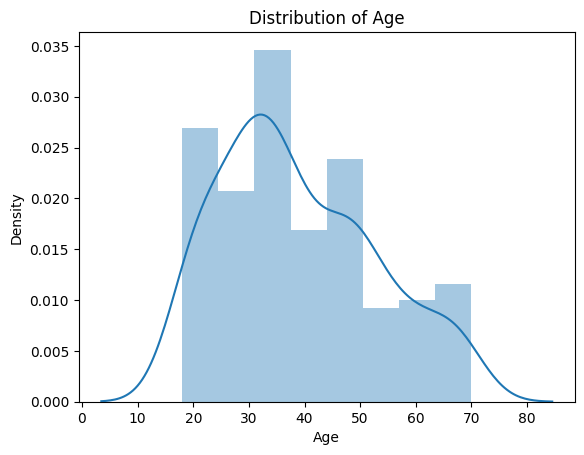

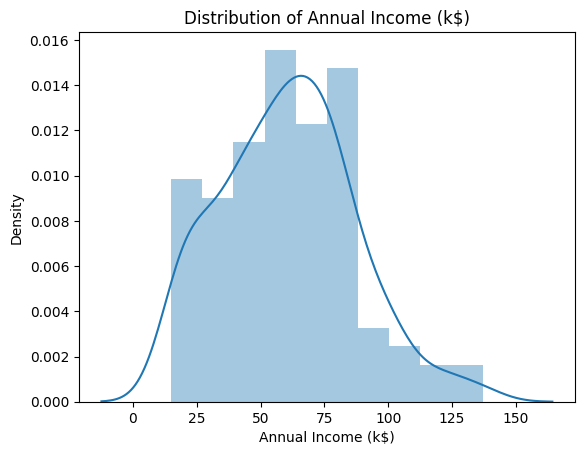

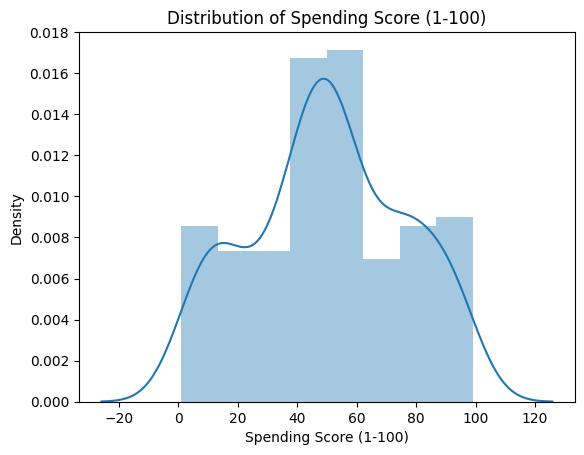

In [6]:
# Getting the Numerical Variables and Plotting the histograms

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.title(f"Distribution of {i}")

*Plot Insights*
- From the Distribution plot we can see the shape of the distribution of the data, which is normal and unsymmetrical.
- We can also infer the range in which each numerical column is varied along with the Central tendecies.

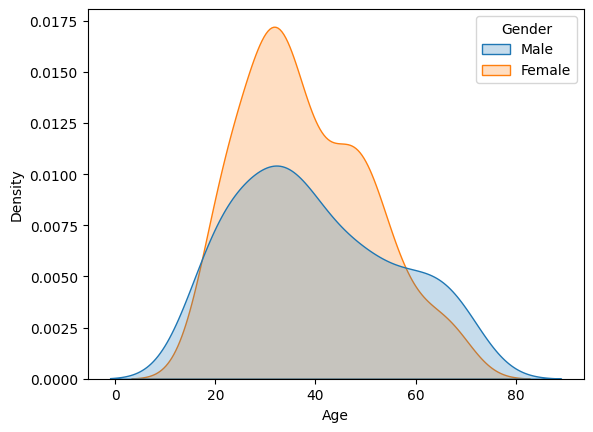

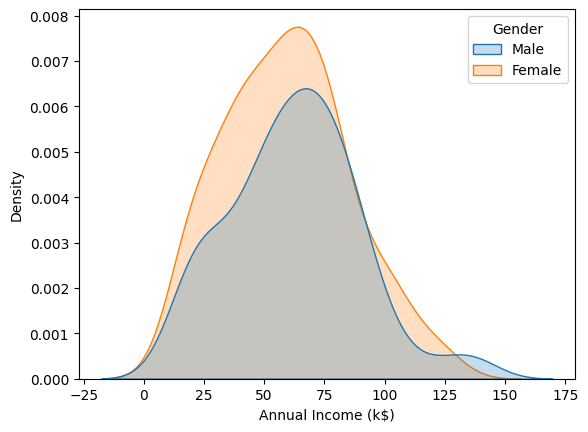

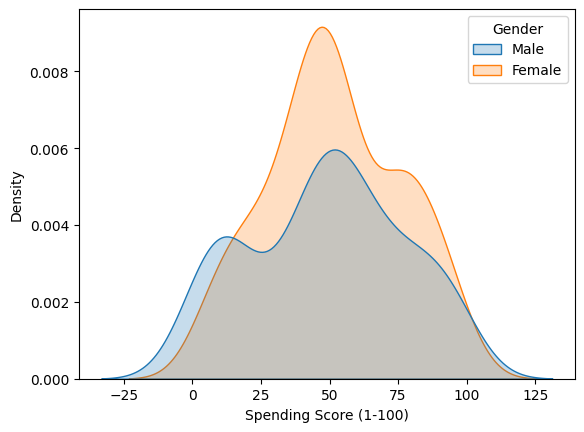

In [7]:
# KDE Plot with  Gender
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data = df, x = df[i],shade=True,hue = df['Gender']);

*Plot Insights*
- The KDE plot above is also depicting the same info as the distribution plot, but with an additional dimension(GENDER).
- When we consider the Age, there is a lot of female customers in the age range 20-40 compared to Males in the same range of age.
- When it comes to Spending Scores of Men we can see that a significant amount of them have very less spending scores.
- Therefore, here we can see the distribution of the data of each numerical columns based on the Gender.
- Also the flat tails indicates the presence of Outliers.
- It is very essential to make a note of this since we are focusing on increasing sales.

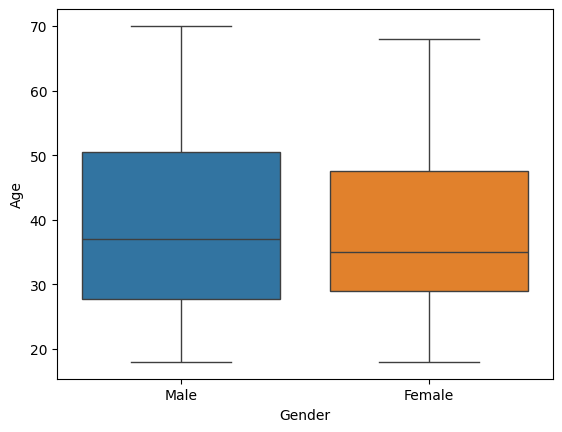

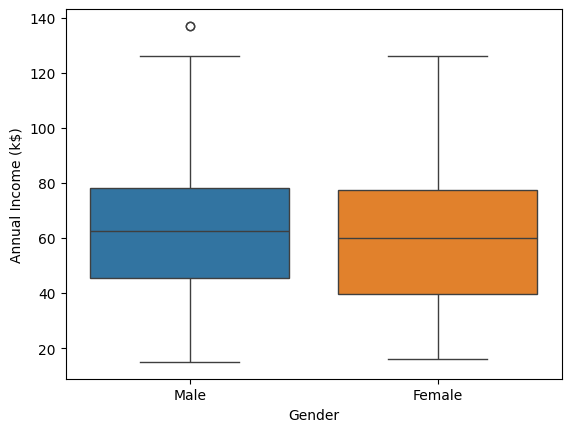

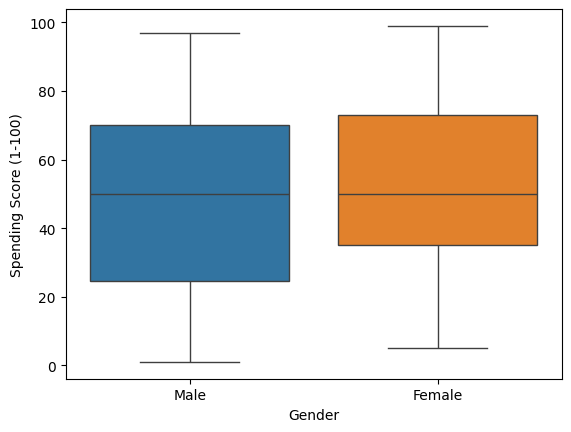

In [8]:
# columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i], hue = 'Gender')

*Plot Insights*
- Age: Median is higher for males than females. Also we can infer that the age of the males who shops have a larger range that of females.
- Income: Here, we can see the presence of an outlier, which also can be confirmed by the flat tail in the KDE plot.
- Spending Score: Here we can infer that the spending scores of Females are lot better than Males, which implies that we need to put more focus on Male products and to improve their scores.

In [9]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

*Data Insights*

- In the data 56% are female and rest 44% are Male.

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

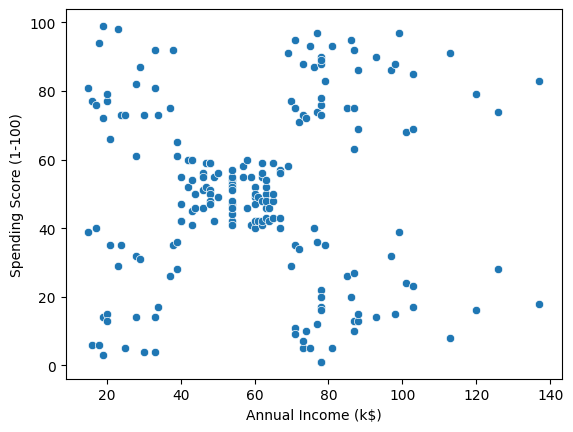

In [10]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

*Plot Insights*
- We can see the clusters in the scatterplot of the Income and Spending Scores.


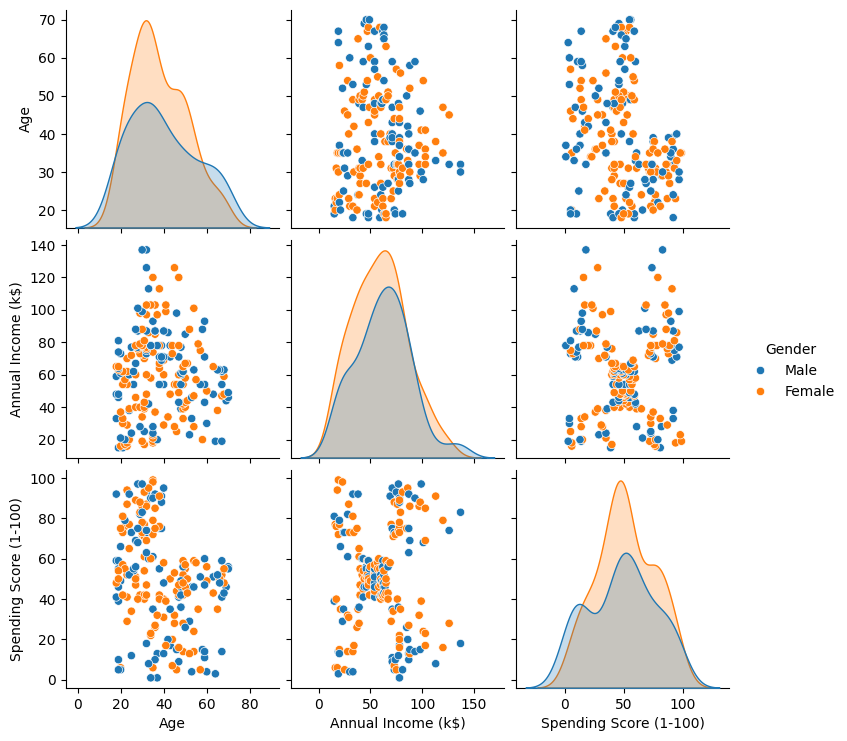

In [11]:
df_pairplot=df.drop('CustomerID',axis=1)
sns.pairplot(df_pairplot,hue='Gender')

In [12]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

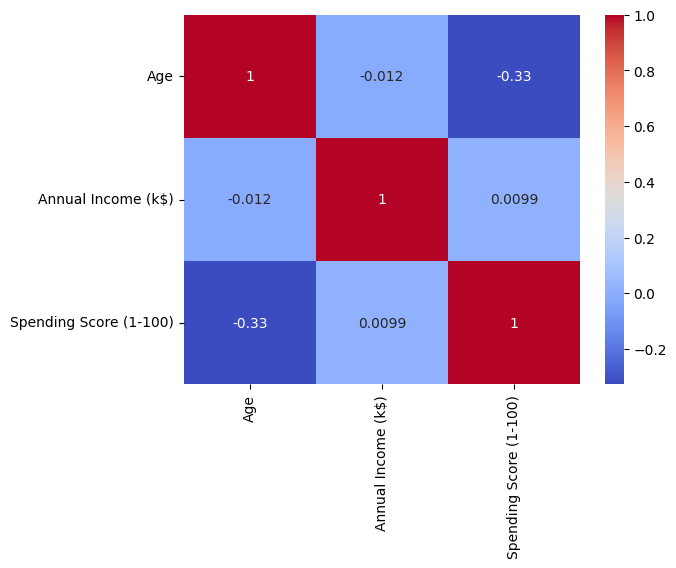

In [13]:
sns.heatmap(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')

*Plot Insights*

- We can see all the columns have very less correlation between each other. It means that there is no significant relationship between the columns. This can negatively impact the clustring process.

## Clustering - Univariate, Bivariate, Multivariate

### Setting the Hyperparameter K

In [14]:
# clustering1 = KMeans(n_clusters=3)
# plt.scatter(df['Annual Income (k$)'])

### Elbow Method

  File "C:\Users\dijdo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


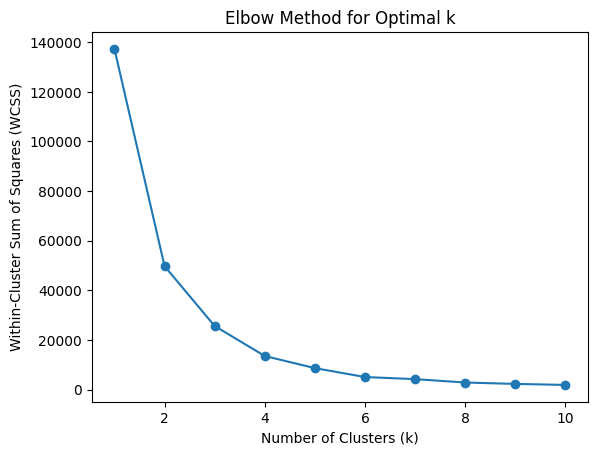

In [15]:
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Annual Income (k$)']])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow Curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

*Plot Insights*

- In this elbow plot we can see that therate of decrease of WCSS decreases at the elbow point where K = 3. Therefore K can be the optimum number of cluster.

In [16]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3, random_state=42)

In [17]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [18]:
df['Income Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [19]:
df['Income Cluster'].value_counts()

Income Cluster
0    86
2    58
1    56
Name: count, dtype: int64

In [20]:
kmeans.inertia_

25640.457784396836

In [21]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


In [22]:
from sklearn.metrics import silhouette_score
acc = silhouette_score(df[['Annual Income (k$)']], kmeans.labels_)
acc

0.5188101430914764

## Bivariate Clustering

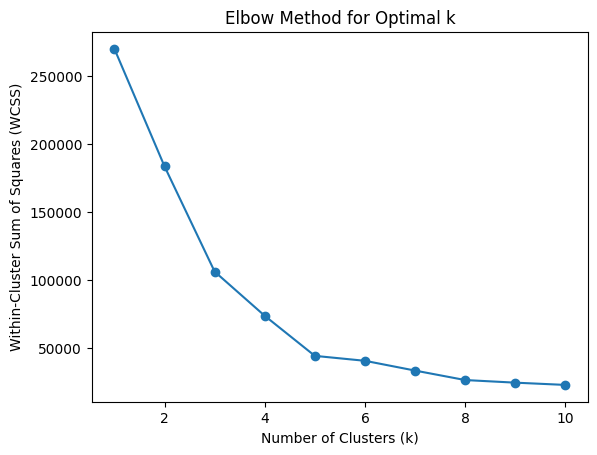

In [23]:
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow Curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=42)

In [25]:
df['Spending and Income Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,2,4


In [26]:
df['Spending and Income Cluster'].value_counts()

Spending and Income Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

In [27]:
kmeans.inertia_

44448.45544793371

In [28]:
centers =pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


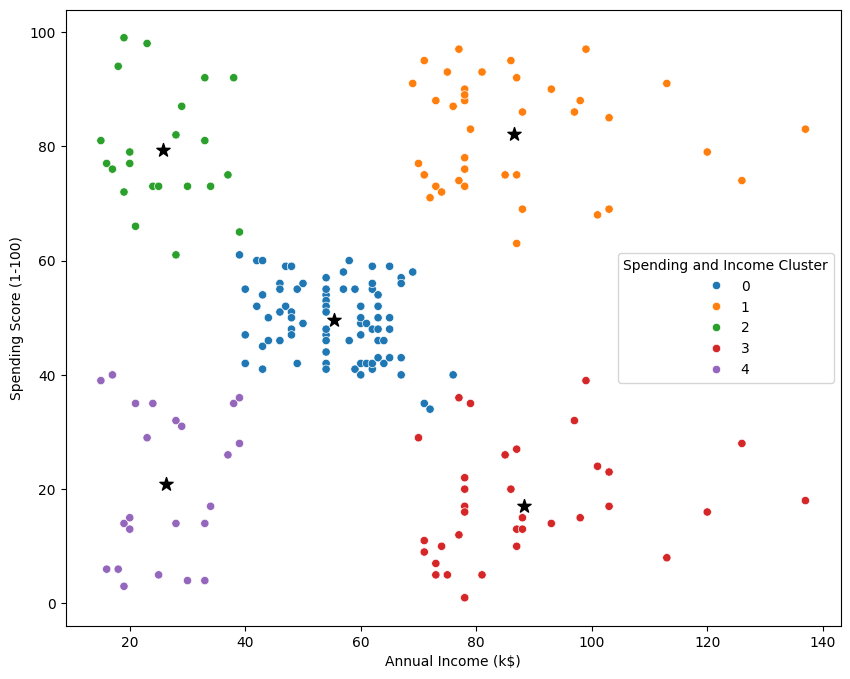

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

*Plot Insights*
- In this plot we can see the presence of 5 clusters and corresponding centers. 
- 5 can be considered as the optimum number of clusters since it's Interita is low compared to other k values.

In [30]:

df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [31]:
from sklearn.metrics import silhouette_score
acc = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
acc

0.553931997444648

## Applying K-Means after Scaling

In [32]:
## Applying Scaling and then Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,4,True
1,2,21,15,81,2,2,True
2,3,20,16,6,2,4,False
3,4,23,16,77,2,2,False
4,5,31,17,40,2,4,False


In [33]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   CustomerID                   200 non-null    int64
 1   Age                          200 non-null    int64
 2   Annual Income (k$)           200 non-null    int64
 3   Spending Score (1-100)       200 non-null    int64
 4   Income Cluster               200 non-null    int32
 5   Spending and Income Cluster  200 non-null    int32
 6   Gender_Male                  200 non-null    bool 
dtypes: bool(1), int32(2), int64(4)
memory usage: 8.1 KB


In [34]:
df1 = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,1.362171,1.798458,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,1.362171,0.415029,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,1.362171,1.798458,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,1.362171,0.415029,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,1.362171,1.798458,-0.886405


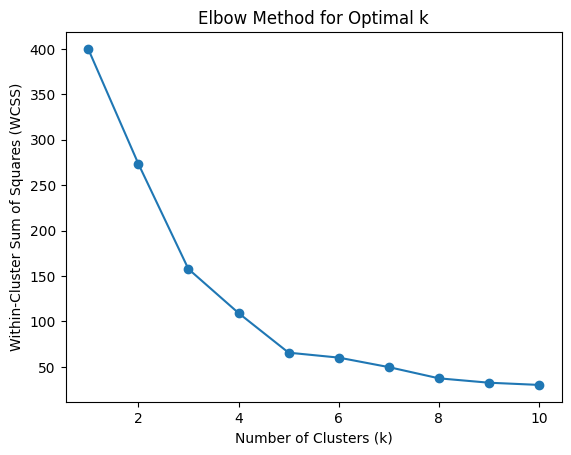

In [35]:
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow Curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
# df['Spending and Income Cluster'] = kmeans.labels_
kmeans.inertia_

44448.45544793371

In [37]:
centers =pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


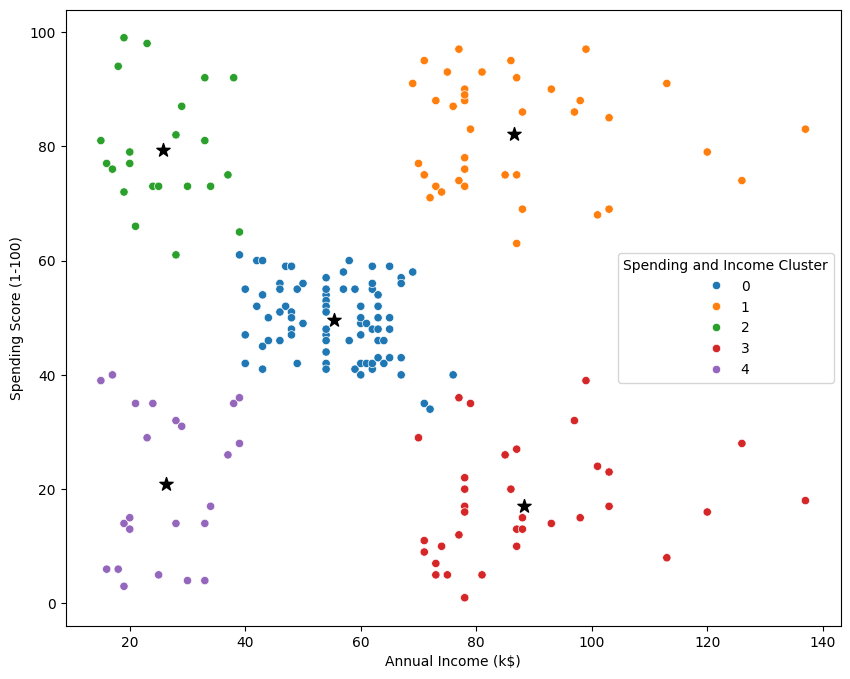

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [39]:
from sklearn.metrics import silhouette_score
acc = silhouette_score(df1[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
print(f"The Silhoutte Score is: {acc}")

The Silhoutte Score is: 0.5546571631111091


**Data Insights**
- The Silhoutte score comes to be 0.55 which says that the quality of the clusters obtained can be considered as good. If the value is more close to 1 we can infer that the quality of cluster is very appreciatable.

## *Conclusion*

- Here, we get 5 clusters based on the Annual Income and Spending Score of the customer.
- The sales team should focus on Cluster 3 who has more annual income but less spending score.
- Rest all clusters in clusters need to be maintained as it is.